In [1]:
from cuqi.distribution import DistributionGallery, Gaussian, JointDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS
import time
from cuqi.model import LinearModel
import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
from cuqi.distribution import Distribution, JointDistribution, UserDefinedDistribution
import pandas as pd

# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))
import math
import utilities as ut
import benchmarksClass as BC 


In [2]:
# The donut distribution 
# target_donut = BM.


target_mm = BC.Donut()

In [3]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [7]:
sampler = ut.MCMCComparison(target =target_mm, scale = 0.1, Ns= 100, Nb =10, dim = 2, seed = 42, chains = 3,x0 = y, selected_criteria=["Rhat"], selected_methods=["MH"])



In [8]:
sampler.x0

array([0.95201109, 1.45255025])

In [16]:
df = sampler.create_comparison()

Sample 110 / 110

Average acceptance rate: 0.73 

RHATTTTT
Sample 110 / 110

Average acceptance rate: 0.73 

Sample 110 / 110

Average acceptance rate: 0.73 



In [10]:
sampler.x0

array([0.95201109, 1.45255025])

In [17]:
df

,MH
samples,100
burnins,10
scale,0.1
Rhat(v0),1.515
Rhat(v1),1.094


In [11]:
sampler.

SyntaxError: invalid syntax (2722551173.py, line 1)

In [12]:
if hasattr(sampler.x0, '__module__'): print("yes")
else: print("no")

no


In [13]:
sampler.sampling_results["MH"]['samples']

In [14]:
sampler.x0.__module__


AttributeError: 'numpy.ndarray' object has no attribute '__module__'

In [15]:
sampler.target.prior

AttributeError: 'Donut' object has no attribute 'prior'

In [8]:
sampler.get_sampling_result('MH')

{'samples': <cuqi.samples._samples.Samples at 0x7fe8a4087340>,
 'profiling': <cProfile.Profile at 0x7fe8804476a0>}

In [9]:
sampler.target

CUQI Donut.

In [13]:
df

,MH
samples,100
burnins,10
scale,0.1
ESS(v0),1.573
ESS(v1),1.898
AR,0.75
LogPDF,110
Gradient,0
LogPDF/ESS,63.375
Gradient/ESS,0.0


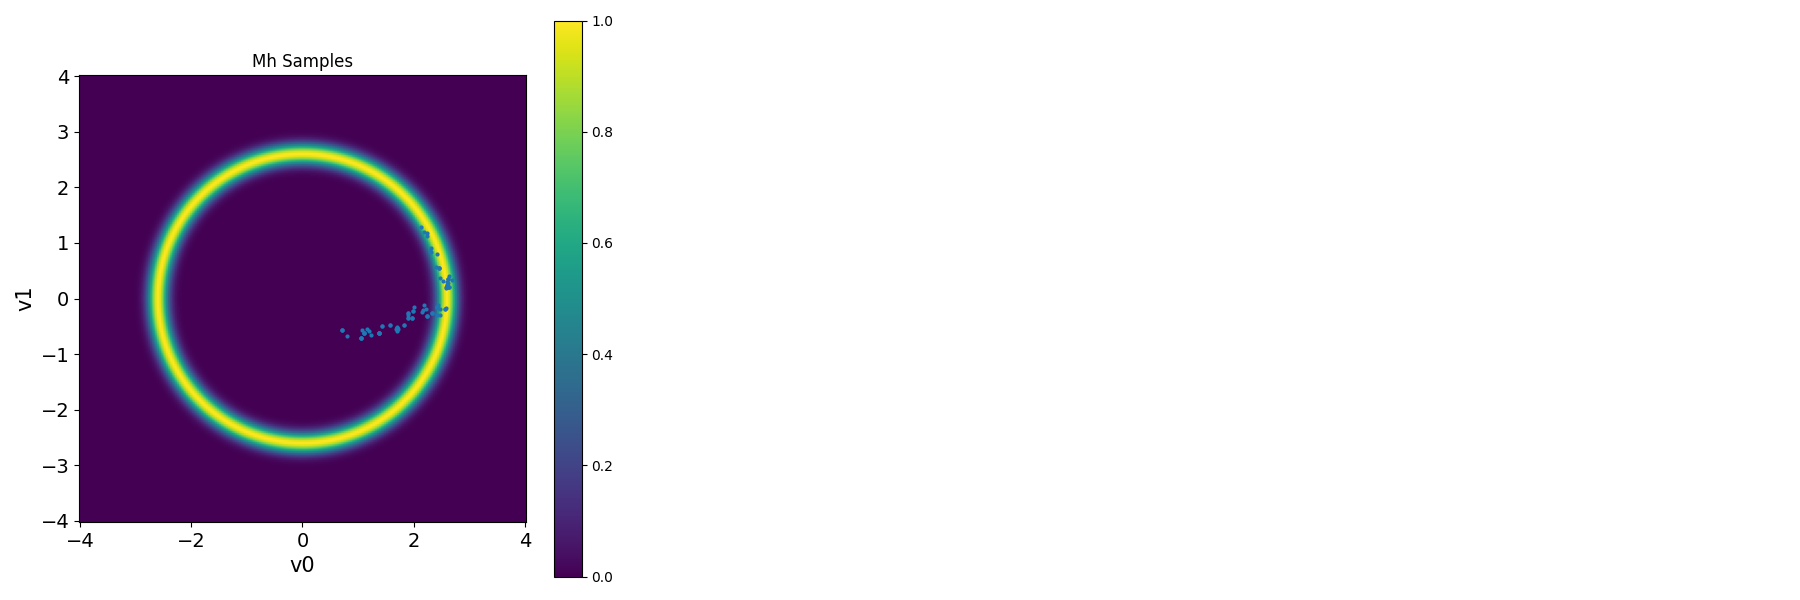

In [11]:
x = sampler.create_plt()


In [23]:
df["MH"]

samples            100
burnins             10
scale              0.1
ESS(v0)          1.651
ESS(v1)          2.445
AR                0.76
LogPDF             110
Gradient             0
LogPDF/ESS      53.711
Gradient/ESS       0.0
Name: MH, dtype: object

In [6]:
df2, (fig, axs)  = TA.create_comparison(
    target_mm, 
    0.05, 
    100,
    10,
    x0 = y,
    seed=12, 
    chains = 2,
    selected_methods=["MH", "MH_adapted", "CWMH", "CWMH_adapted"]
)


Sample 110 / 110

Average acceptance rate: 0.76 

Sample 110 / 110

Average acceptance rate: 0.55 MCMC scale: 0.30299100482732133 

Sample 110 / 110

Average acceptance rate all components: 0.7649999999999999 

Sample 110 / 110

Average acceptance rate all components: 0.72 

Sample 110 / 110

Average acceptance rate: 0.9 

Sample 110 / 110

Average acceptance rate: 0.61 MCMC scale: 0.279475249816773 

Sample 110 / 110

Average acceptance rate all components: 0.795 

Sample 110 / 110

Average acceptance rate all components: 0.7350000000000001 



In [10]:
df

,NUTS,MH
samples,100,100.000
burnins,10,10.000
scale,-,0.050
ESS(v0),34.876,1.904
ESS(v1),46.566,9.197
AR,0.99,0.890
LogPDF,3887,110.000
Gradient,3887,0.000
Rhat(v0),1.026,2.274
Rhat(v1),1.038,1.679


In [8]:
df

,NUTS,MH
samples,100,100.000
burnins,10,10.000
scale,-,0.050
ESS(v0),34.876,1.904
ESS(v1),46.566,9.197
AR,0.99,0.890
LogPDF,3887,110.000
Gradient,3887,0.000
Rhat(v0),1.026,2.274
Rhat(v1),1.038,1.679


In [7]:
df2

,MH,MH_adapted,CWMH,CWMH_adapted
samples,100.000,100.000,100.000,100.000
burnins,10.000,10.000,10.000,10.000
scale,0.050,0.050,0.050,0.050
ESS(v0),1.483,6.470,1.416,1.894
ESS(v1),1.423,2.463,1.415,6.124
AR,0.770,0.560,0.700,0.720
LogPDF,110.000,110.000,219.000,219.000
Gradient,0.000,0.000,0.000,0.000
Rhat(v0),2.518,2.036,3.036,1.772
Rhat(v1),2.678,1.646,1.669,1.650


/tmp/ipykernel_43425/3856682864.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc['samples'] = df2.loc['samples'].apply(lambda x: f"{x:.0f}")
/tmp/ipykernel_43425/3856682864.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc['samples'] = df2.loc['samples'].apply(lambda x: f"{x:.0f}")
/tmp/ipykernel_43425/3856682864.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc['samples'] = df2.loc['samples'].apply(lambda x: f"{x:.0f}")
/tmp/ip

In [34]:
df2

,MH,MH_adapted,CWMH,CWMH_adapted
samples,100,100,100,100
burnins,10.0,10.0,10.0,10.0
scale,0.05,0.05,0.05,0.05
ESS(v0),1.483,6.47,1.416,1.894
ESS(v1),1.423,2.463,1.415,6.124
AR,0.77,0.56,0.7,0.72
LogPDF,110.0,110.0,219.0,219.0
Gradient,0.0,0.0,0.0,0.0
Rhat(v0),2.518,2.036,3.036,1.772
Rhat(v1),2.678,1.646,1.669,1.65


In [30]:
for index, row in df.iterrows():
    print(row["samples"], row["scale"])

KeyError: 'samples'

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl

df2 = pd.DataFrame({
    "strings": ["Adam", "Mike"],
    "ints": [1, 3],
    "floats": [1.123, 1000.23]
})
s = a"ULA"].style.format('{:.0f}')


AttributeError: 'Series' object has no attribute 'style'

In [20]:
print(df)

             ULA   MALA
samples  100.000  100.0
burnins   10.000    0.0
scale      0.050    0.1
ESS(v0)    2.501  100.0
ESS(v1)   16.994  100.0


In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
df = {}
for i in range(3):
    df[i]={}
    df[i]["float"] = 1.23
    df[i]["number"] = 1


df2 = pd.DataFrame(df)
for i in df2[0]:
    if isinstance(i, int):
        i.apply()

# for s in enumerate(len(df[0])):
#     print(df2[0][s])


1.23
1.0


In [29]:
len(df[0])

2

In [24]:
import pandas as pd
import numpy as np

# Create a DataFrame


# Define a custom formatter function for different row precisions
def format_row(value, row_idx):
    if row_idx == "samples":
        return f"{value:.1f}"  # 1 decimal place for the first row
    elif row_idx == 1:
        return f"{value:.2f}"  # 2 decimal places for the second row
    elif row_idx == 2:
        return f"{value:.3f}"  # 3 decimal places for the third row
    else:
        return f"{value:.6f}"  # Default to 6 decimal places

# Apply the formatting row by row
formatted_df = df.copy()
for i in range(len(df)):
    formatted_df.iloc[i] = df.iloc[i].apply(lambda x: format_row(x, i))

# Print the formatted DataFrame
(formatted_df)


/tmp/ipykernel_58510/311917409.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_df.iloc[i] = df.iloc[i].apply(lambda x: format_row(x, i))
/tmp/ipykernel_58510/311917409.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_df.iloc[i] = df.iloc[i].apply(lambda x: format_row(x, i))
/tmp/ipykernel_58510/311917409.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_df.iloc[i] = df.iloc[i].apply(lambda x: format_row(x, i))


,A,B,C
0,1.1,4.1,7.1
1,2.65,5.65,8.65
2,3.142,6.142,9.142


In [13]:
if isinstance(a, int):
    a = np.full(3, a)
a

array([1000, 1000, 1000])

In [14]:
type(a[0])

numpy.int64

In [12]:
df.style \
  .format(precision=1) 

,MH_fixed,CWMH,ULA,MALA,NUTS
samples,100.0,100.0,100.0,100.0,100.0
burnins,10.0,10.0,10.0,10.0,10.0
scale,0.1,0.1,0.1,0.1,0.1
ESS(v0),1.5,1.4,2.1,1.7,25.1
ESS(v1),1.4,1.4,1.5,2.7,36.4


In [5]:
df

,ULA,MALA
samples,100.000,100.0
burnins,10.000,0.0
scale,0.050,0.1
ESS(v0),2.501,100.0
ESS(v1),16.994,100.0


In [16]:
type(df["CWMH"]["samples"])

numpy.float64

df

In [6]:
df

,MH_fixed,CWMH,ULA,MALA,NUTS
samples,100.000,100.000,100.000,100.000,100.000
burnins,10.000,10.000,10.000,10.000,10.000
scale,0.050,0.050,0.050,0.050,0.050
ESS(v0),1.483,1.416,2.086,1.665,25.082
ESS(v1),1.423,1.415,1.534,2.711,36.366


In [2]:
TA.plot_pdf_2D(target_mm, -10, 10, -10, 10,N2=201)

NameError: name 'TA' is not defined

In [6]:
x = Gaussian(np.zeros(2), 2.5)
A_matrix = np.array([[1.0, 1.0]])
A = LinearModel(A_matrix)
b= Gaussian(A@x, 0.1)
BP = BayesianProblem(b, x)

specific =  np.array([1.5,1.5 ])
b_ob = b(x = specific).sample()
BP.set_data(b=b_ob)

BayesianProblem with target: 
 Posterior(
    Equation:
	 p(x|b) ∝ L(x|b)p(x)
    Densities:
	b ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )

In [9]:
target = UserDefinedDistribution(dim = 2, logpdf_func = BP.posterior.logpdf, gradient_func = BP.posterior.gradient)

In [5]:
x = Gaussian(np.zeros(2), 2.5)
A_matrix = np.array([[1.0, 1.0]])
A = LinearModel(A_matrix)
b= Gaussian(A@x, 0.1)
b

CUQI Gaussian. Conditioning variables ['x'].

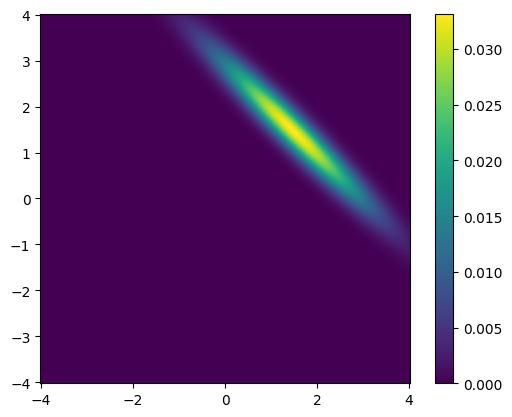

In [3]:
TA.plot_pdf_2D(target_mm, -4, 4, -4, 4)

In [4]:
df, (fig, axs)  = TA.create_comparison(
    target_donut, 
    [0.05, 0.05, 0.065, 0.065, 0.05 ], 
    [100, 85, 100, 100, 100], 
    [0, 15, 0, 50, 10], 
    x0 = np.array([1, 1]),
    seed=12, 
    chains = 2
)


Sample 100 / 100

Average acceptance rate: 0.77 

Sample 100 / 100

Average acceptance rate all components: 0.7 

Sample 100 / 100
Sample 150 / 150
Sample 110 / 110
